In [1]:
import pandas as pd
import numpy as np
import warnings as wr
wr.filterwarnings("ignore")

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.replace(to_replace=["Male", "Female"], value=[1,0], inplace=True) #male=1 ' female=0'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   int64  
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 200.6 KB


In [6]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [7]:
df.Gender.value_counts()

1    5000
0    3555
Name: Gender, dtype: int64

In [8]:
x = df.drop('Weight', axis=1)
y = df[['Weight']]

In [9]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [10]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [11]:
x.shape

(8555, 2)

In [12]:
y.shape

(8555, 1)

In [13]:
x.mean()

Gender     0.584454
Height    66.809925
dtype: float64

In [14]:
y.mean()

Weight    165.632735
dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train, test = train_test_split(df,test_size = .25) #testing data 25%

In [17]:
train.shape

(6416, 3)

In [18]:
test.shape

(2139, 3)

In [19]:
train.head()

,Gender,Height,Weight
7040,0,68.178658,144.333579
2566,1,70.041417,201.546425
7832,0,64.728540,152.378222
5420,0,64.642613,128.606254
2950,1,68.690373,200.307314


In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.30, random_state=0) #testing data=25%

In [21]:
xtrain.head()

,Gender,Height
3197,1,69.689848
4394,1,66.299441
7711,0,63.261527
7019,0,62.035319
898,1,67.272171


In [22]:
ytrain.head()

,Weight
3197,186.377448
4394,159.235988
7711,126.426793
7019,119.418135
898,187.363366


# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [26]:
m = lr.coef_
m

array([[19.67647385,  5.95976283]])

In [27]:
c = lr.intercept_
c

array([-244.11178083])

In [28]:
yp =  19.67647385*1+5.95976283*69+-244.1117808

In [29]:
yp

186.78832831999998

In [30]:
lr.predict([[1, 69]])

array([[186.78832817]])

In [31]:
lr.coef_

array([[19.67647385,  5.95976283]])

In [32]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [33]:
df['predicted_weight'] = lr.predict(x)
df.head()

,Gender,Height,Weight,predicted_weight
0,1,73.847017,241.893563,215.675400
1,1,68.781904,162.310473,185.488528
2,1,74.110105,212.740856,217.243344
3,1,71.730978,220.042470,203.064312
4,1,69.881796,206.349801,192.043622


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
mse = mean_squared_error(ytest, lr.predict(xtest))
mae = mean_absolute_error(ytest, lr.predict(xtest))

mse

In [36]:
mae

8.029100527825232

In [37]:
lr.score(xtest,ytest)

0.9025307579174771

In [38]:
lr.predict([[1,70]])

array([[192.748091]])

# KNN Regression

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
kn = KNeighborsRegressor(n_neighbors = 100)

In [41]:
kn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=100)

In [42]:
KNeighborsRegressor(n_neighbors =100)

KNeighborsRegressor(n_neighbors=100)

In [43]:
kn.predict(xtest)

array([[156.35772974],
       [184.89462646],
       [148.91700973],
       ...,
       [160.19922469],
       [168.0546762 ],
       [138.63572067]])

In [44]:
mse = mean_squared_error(ytest, kn.predict(xtest))
mae = mean_absolute_error(ytest, kn.predict(xtest))

In [45]:
mse

107.7627941322304

In [46]:
mae

8.188668873339074

# Classification

In [47]:
x = df.drop('Gender', axis=1)
y = df[['Gender']]

In [48]:
x.head()

,Height,Weight,predicted_weight
0,73.847017,241.893563,215.675400
1,68.781904,162.310473,185.488528
2,74.110105,212.740856,217.243344
3,71.730978,220.042470,203.064312
4,69.881796,206.349801,192.043622


In [49]:
y.head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.30, random_state=0) #testing data=25%

In [51]:
xtrain.head()

,Height,Weight,predicted_weight
3197,69.689848,186.377448,190.899661
4394,66.299441,159.235988,170.693636
7711,63.261527,126.426793,132.911914
7019,62.035319,119.418135,125.604008
898,67.272171,187.363366,176.490875


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier()

In [53]:
knn_classifier = KNeighborsClassifier(n_neighbors=100)

In [54]:
knn_classifier.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=100)

In [55]:
KNeighborsClassifier(n_neighbors=100)

KNeighborsClassifier(n_neighbors=100)

In [56]:
yp2 = knn_classifier.predict(xtest)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
cm = confusion_matrix(ytest, yp2)
cm

array([[1001,   67],
       [  80, 1419]], dtype=int64)

In [59]:
accuracy = accuracy_score(ytest, yp2)
accuracy

0.9427347097779509

Text(58.222222222222214, 0.5, 'Actual')

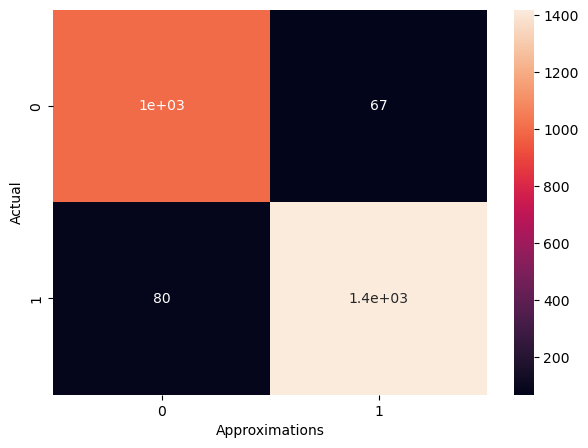

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sn

plt.figure(figsize = (7,5))

sn.heatmap(cm, annot = True)

plt.xlabel('Approximations')

plt.ylabel('Actual')